In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr
from scipy import signal as sig
from scipy.io import loadmat

In [2]:
#open data
raw_training_data = loadmat('..\\raw_training_data.mat')

In [3]:
#glove data for training - per subject
train_dg_s1 = raw_training_data['train_dg'][0][0]
train_dg_s2 = raw_training_data['train_dg'][1][0]
train_dg_s3 = raw_training_data['train_dg'][2][0]

In [4]:
train_dg_s1_downsample = train_dg_s1[::50][:-1]
train_dg_s2_downsample = train_dg_s2[::50][:-1]
train_dg_s3_downsample = train_dg_s3[::50][:-1]

In [5]:
file_s1 = open("all_feats_s1_train_fx.npy", "rb")
feats_s1_train = np.load(file_s1)
file_s1.close()

file_s2 = open("all_feats_s2_train_fx.npy", "rb")
feats_s2_train = np.load(file_s2)
file_s2.close()

file_s3 = open("all_feats_s3_train_fx.npy", "rb")
feats_s3_train = np.load(file_s3)
file_s3.close()

## Prediction Interpolation

In [6]:
from scipy.interpolate import interp1d

In [7]:
def repeat_preds(preds, window_to_time_ratio=50):
    pred_all = []
    for row in preds:
        for i in range(window_to_time_ratio):
            pred_all.append(row)

    # For out problem, it is short 50 entries, so add the last row 50 more times
    for i in range(window_to_time_ratio):
        pred_all.append(row)
    
    return np.array(pred_all)

def interp_preds(preds, time_length):
    # N samples
    preds_sample_orig = np.arange(len(preds))
    
    # T time points
    preds_sample_target = np.arange(time_length)
    
    preds = preds.transpose()

    preds_interp = []
    
    for finger_preds in preds:
        f = interp1d(preds_sample_orig, finger_preds)
        new_preds = f(preds_sample_target)
        preds_interp.append(new_preds)
    
    preds_interp = np.array(preds_interp).transpose()
    
    return preds_interp

def compute_corr(preds, truth):
    subj_corr = []
    for i in range(5):
        finger_pred = preds.transpose()[i]
        finger_truth = truth.transpose()[i]
        subj_corr.append(pearsonr(finger_pred, finger_truth)[0])
    
    return subj_corr

## Subject 1

In [8]:
reg_rfr_s1 = pickle.load(open('subject1_rfr_1000.model', 'rb'))
pred_s1 = reg_rfr_s1.predict(feats_s1_train)

In [11]:
pred_s1_repeat = repeat_preds(pred_s1, 50)
#pred_s1_interp = repeat_preds(pred_s1, len(train_dg_s1))
print(pred_s1_repeat.shape)
#print(pred_s1_interp.shape)
print(train_dg_s1.shape)

(300000, 5)
(300000, 5)


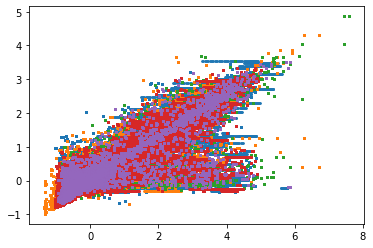

In [22]:
plt.scatter(train_dg_s1.transpose()[0], pred_s1_repeat.transpose()[0], s=3)
plt.scatter(train_dg_s1.transpose()[1], pred_s1_repeat.transpose()[1], s=3)
plt.scatter(train_dg_s1.transpose()[2], pred_s1_repeat.transpose()[2], s=3)
plt.scatter(train_dg_s1.transpose()[3], pred_s1_repeat.transpose()[3], s=3)
plt.scatter(train_dg_s1.transpose()[4], pred_s1_repeat.transpose()[4], s=3)


In [21]:
subj1_corr = compute_corr(pred_s1_repeat, train_dg_s1)
print(subj1_corr)

[0.8509975940194416, 0.8678952133705385, 0.8508496019190802, 0.8523504060311978, 0.8563484006033477]


## Subject 2

In [17]:
reg_rfr_s2 = pickle.load(open('subject2_rfr_1000.model', 'rb'))
pred_s2 = reg_rfr_s2.predict(feats_s2_train)

In [18]:
pred_s2_repeat = repeat_preds(pred_s2, 50)
#pred_s1_interp = repeat_preds(pred_s1, len(train_dg_s1))
print(pred_s2_repeat.shape)
#print(pred_s1_interp.shape)
print(train_dg_s2.shape)

(300000, 5)
(300000, 5)


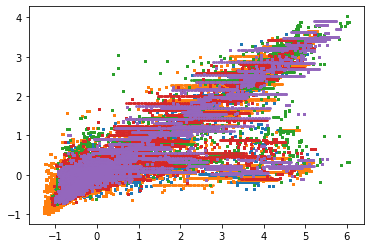

In [19]:
plt.scatter(train_dg_s2.transpose()[0], pred_s2_repeat.transpose()[0], s=3)
plt.scatter(train_dg_s2.transpose()[1], pred_s2_repeat.transpose()[1], s=3)
plt.scatter(train_dg_s2.transpose()[2], pred_s2_repeat.transpose()[2], s=3)
plt.scatter(train_dg_s2.transpose()[3], pred_s2_repeat.transpose()[3], s=3)
plt.scatter(train_dg_s2.transpose()[4], pred_s2_repeat.transpose()[4], s=3)


In [23]:
subj2_corr = compute_corr(pred_s2_repeat, train_dg_s2)
print(subj2_corr)

[0.8927546760119947, 0.8704563742705207, 0.8803957176961519, 0.8721810378991721, 0.8759741930241788]


## Subject 3

In [24]:
reg_rfr_s3 = pickle.load(open('subject3_rfr_1000.model', 'rb'))
pred_s3 = reg_rfr_s3.predict(feats_s3_train)

In [25]:
pred_s3_repeat = repeat_preds(pred_s3, 50)
#pred_s1_interp = repeat_preds(pred_s1, len(train_dg_s1))
print(pred_s3_repeat.shape)
#print(pred_s1_interp.shape)
print(train_dg_s3.shape)

(300000, 5)
(300000, 5)


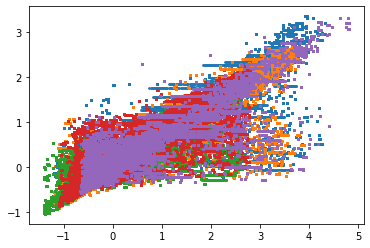

In [27]:
plt.scatter(train_dg_s3.transpose()[0], pred_s3_repeat.transpose()[0], s=3)
plt.scatter(train_dg_s3.transpose()[1], pred_s3_repeat.transpose()[1], s=3)
plt.scatter(train_dg_s3.transpose()[2], pred_s3_repeat.transpose()[2], s=3)
plt.scatter(train_dg_s3.transpose()[3], pred_s3_repeat.transpose()[3], s=3)
plt.scatter(train_dg_s3.transpose()[4], pred_s3_repeat.transpose()[4], s=3)


In [26]:
subj3_corr = compute_corr(pred_s3_repeat, train_dg_s3)
print(subj3_corr)

[0.8978521447564057, 0.8819424136601375, 0.884203991853101, 0.8921962863843796, 0.8916418227539928]


# Predict Leaderboard

In [28]:
file_s1 = open("all_feats_s1_test_fx.npy", "rb")
feats_s1_test = np.load(file_s1)
file_s1.close()

file_s2 = open("all_feats_s2_test_fx.npy", "rb")
feats_s2_test = np.load(file_s2)
file_s2.close()

file_s3 = open("all_feats_s3_test_fx.npy", "rb")
feats_s3_test = np.load(file_s3)
file_s3.close()

In [45]:
pred_s1_test = reg_rfr_s1.predict(feats_s1_test)
pred_s1_test_repeat = repeat_preds(pred_s1_test, 50)

print(pred_s1_test_repeat.shape)

pred_s2_test = reg_rfr_s2.predict(feats_s2_test)
pred_s2_test_repeat = repeat_preds(pred_s2_test, 50)

print(pred_s2_test_repeat.shape)

pred_s3_test = reg_rfr_s3.predict(feats_s3_test)
pred_s3_test_repeat = repeat_preds(pred_s3_test, 50)

print(pred_s3_test_repeat.shape)

(147500, 5)
(147500, 5)
(147500, 5)


In [43]:
from scipy.io import savemat

In [46]:
predictions_array = np.zeros((3,1), dtype=object)
predictions_array[0,0] = pred_s1_test_repeat
predictions_array[1,0] = pred_s2_test_repeat
predictions_array[2,0] = pred_s3_test_repeat


In [47]:
savemat('predictions.mat', {'predicted_dg':predictions_array})